In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive')

['Colab Notebooks',
 'Screenshot_20210627-131856 (1).png',
 'Screenshot_20210627-131856.png',
 'Screenshot_20210627-131853.png',
 'Screenshot_20210627-131848.png',
 'IMG-20210625-WA0004.jpg',
 'IMG-20210625-WA0001.jpg',
 'IMG-20210625-WA0002.jpg',
 'IMG-20210625-WA0000.jpg',
 'IMG-20210625-WA0005.jpg',
 'IMG-20210625-WA0003.jpg',
 'ولاء الجندي، و محرزية الطويل - خانات الذكريات - مرحلة المواجهة – MBCTheVoice(240P).mp4',
 'وعنده مفاتح الغيب. محمود الشحات أنور المقطع الأكثر انتشارآ علي السوشيال ميديا(240P).mp4',
 'IMG_20181018_094846.jpg',
 'IMG_20181018_094839.jpg',
 'IMG_20180625_144837.jpg',
 'IMG_20180625_144831.jpg',
 'IMG_20171030_093212.jpg',
 'IMG_20171129_143018.jpg',
 'IMG_20171030_093128.jpg',
 'IMG_20171030_093525.jpg',
 'IMG_20171129_143009.jpg',
 'IMG_20171030_093131.jpg',
 'gbt-fsqp-nsj - 29 ديسمبر 2022.pdf',
 'نموذج بدون عنوان (2).gform',
 'نموذج بدون عنوان (1).gform',
 'نموذج بدون عنوان.gform',
 'try.zip',
 'University_ID.jpg',
 'Screenshot 2024-07-27 074805.png',
 'Sc

In [ ]:
!unzip -q "/content/drive/MyDrive/data1a.zip" -d "/content/"

In [ ]:
BASE_DIR = "/content/data1a"

In [ ]:
import os
BASE_DIR = "/content/data1a"

print("Folders inside BASE_DIR:", os.listdir(BASE_DIR))
print("Training folders:", os.listdir(os.path.join(BASE_DIR, "training")))
print("Validation folders:", os.listdir(os.path.join(BASE_DIR, "validation")))

Folders inside BASE_DIR: ['training', 'validation']
Training folders: ['01-whole', '00-damage']
Validation folders: ['01-whole', '00-damage']


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


In [ ]:
# --- Define Dataset Paths and Categories ---

BASE_DIR = "/content/data1a"
TRAIN_DIR = os.path.join(BASE_DIR, "training")
VAL_DIR   = os.path.join(BASE_DIR, "validation")

CATEGORIES = ["00-damage", "01-whole"]

print("Training path:", TRAIN_DIR)
print("Validation path:", VAL_DIR)

Training path: /content/data1a/training
Validation path: /content/data1a/validation


In [ ]:
# --- Load and Preprocess Images ---

print("[INFO] Loading and preprocessing images...")

data = []
labels = []

for folder in ["training", "validation"]:
    for category in CATEGORIES:
        folder_path = os.path.join(BASE_DIR, folder, category)
        print(f"Processing {folder}/{category}...")

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            try:
                # Load image and resize to 224x224
                image = load_img(img_path, target_size=(224, 224))
                image = img_to_array(image)
                image = preprocess_input(image)   # Normalize to [-1,1] for MobileNetV2

                data.append(image)
                labels.append(category)
            except Exception as e:
                print(f"[Warning] Skipped {img_path}: {e}")

print(f"[INFO] Total images loaded: {len(data)}")

[INFO] Loading and preprocessing images...
Processing training/00-damage...
Processing training/01-whole...
Processing validation/00-damage...
Processing validation/01-whole...
[INFO] Total images loaded: 2300


In [ ]:
# --- Encode Labels (with one-hot encoding) ---

lb = LabelBinarizer()
labels_encoded = lb.fit_transform(labels)
print("Classes:", lb.classes_)
print("Sample encoded label (before one-hot):", labels_encoded[0])

# Convert to one-hot vectors
labels_encoded = to_categorical(labels_encoded)
print("Sample encoded label (after one-hot):", labels_encoded[0])

Classes: ['00-damage' '01-whole']
Sample encoded label (before one-hot): [0]
Sample encoded label (after one-hot): [1. 0.]


In [ ]:
# --- Convert Lists to NumPy Arrays ---

data = np.array(data, dtype="float32")
labels = np.array(labels_encoded)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (2300, 224, 224, 3)
Labels shape: (2300, 2)


In [ ]:
# --- Split Into Train/Test Sets ---

(trainX, testX, trainY, testY) = train_test_split(
    data, labels, test_size=0.20, stratify=labels, random_state=42)

print("Train data:", trainX.shape)
print("Test data:", testX.shape)

Train data: (1840, 224, 224, 3)
Test data: (460, 224, 224, 3)


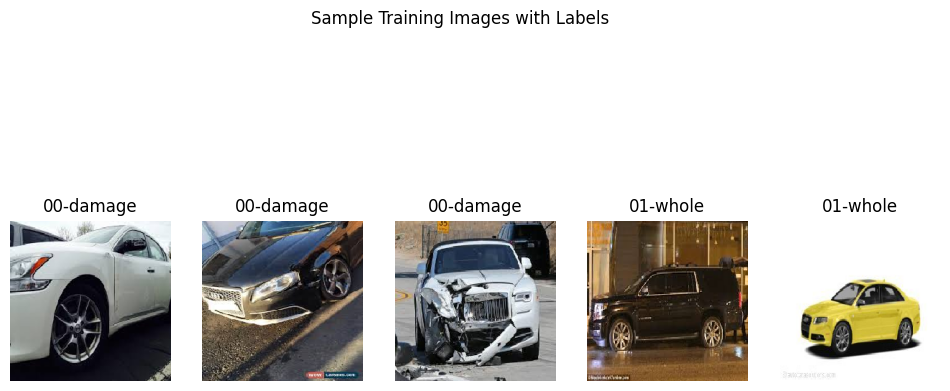

In [ ]:
# --- Visualize a Few Random Sample Images ---

indices = random.sample(range(len(trainX)), 5)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    img = (trainX[idx] + 1) / 2.0           # Convert back to [0,1] for display
    label_idx = np.argmax(trainY[idx])       # Decode one-hot to class index
    label_name = lb.classes_[label_idx]      # Convert index → class label
    plt.imshow(img)
    plt.title(label_name)
    plt.axis("off")

plt.suptitle("Sample Training Images with Labels")
plt.show()

In [19]:
# --- Save Preprocessed Data to Reuse Later ---

np.save("trainX.npy", trainX)
np.save("trainY.npy", trainY)
np.save("testX.npy", testX)
np.save("testY.npy", testY)

print("[INFO] Preprocessed data saved successfully!")

[INFO] Preprocessed data saved successfully!


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
SAVE_DIR = "/content/drive/MyDrive/car_damage_detection"

import os
os.makedirs(SAVE_DIR, exist_ok=True)

np.save(f"{SAVE_DIR}/trainX.npy", trainX)
np.save(f"{SAVE_DIR}/trainY.npy", trainY)
np.save(f"{SAVE_DIR}/testX.npy", testX)
np.save(f"{SAVE_DIR}/testY.npy", testY)

print("[INFO] Files saved to:", SAVE_DIR)

[INFO] Files saved to: /content/drive/MyDrive/car_damage_detection
